## CarpeDM 2017 week 4

모두들 추석 잘 보내고 계신가요?<br/>
첫번째 강의인 "Neural Networks and Deep Learning"이 이번주 부로 종강이네요.<br/>
마지막 코딩 과제가 양이 많고 난이도가 있었던만큼, 그리고 다들 명절(+명절에 나온 과제들)도 여유롭게 즐기셔야하니 이번주 활동은 기한을 넉넉히 두기로 했습니다ㅎㅎ 이번 문제를 해결하면서 함께 천천히 첫번째 강의 내용을 복습해보아요!!

**시간 복잡도(Time complexity)와 공간 복잡도(Space complexity)**

https://en.wikipedia.org/wiki/Big_O_notation <br/>
https://en.wikipedia.org/wiki/Time_complexity <br/>
http://www.leda-tutorial.org/en/official/ch02s02s03.html <br/>
http://ledgku.tistory.com/33 <br/>

딥러닝 알고리즘을 구현하는 데 있어 중요한 것은 손실함수(loss function)의 최소화입니다. 그러나 우리는 항상 일정한 시간적·비용적 제약 하에서 알고리즘을 구현해야 합니다. 항상 목표치에 점근적으로 수렴한다는 사실이 증명된 알고리즘보다, 경우에 따라서는 오차의 하계(lower bound)가 주어진 알고리즘을 이용해 문제를 해결하는 편이 더 실용적일 수도 있습니다. 따라서 알고리즘을 짤 때에는 실제로 잘 동작하는지(functionality)와 더불어 어느정도의 시간과 메모리를 필요로 하는지를 확인해보아야 합니다.

그러나 복잡한 딥러닝 네트워크의 코드를 한줄한줄 따라가면서 직접 복잡도를 수식으로 계산하는 일은 무척 고단하므로, 우리는 big-O 표기법 대신 여러번의 모의 수행을 통해 각자의 프로세서가 필요로 하는 평균 시간과 메모리를 구해보도록 합시다!

**활동 내용**
- 첫번째 블록에 그 형태가 주어진 Dense 클래스를 완성해봅시다. Dense 클래스의 세부사항은 다음과 같습니다.
    - Dense 객체는 한 노드계층에서 바로 다음 노드계층을 연결해주는 단층 레이어입니다.
        - prev, next는 각각 자신을 기준으로 한 직전, 직후의 레이어를 지칭합니다. prev, next를 정의해주는 경우, 해당 Dense 객체의 입력값, 출력값의 수는 직전, 직후의 레이어의 크기에 맞추어 자동으로 결정됩니다.
        - 한편 prev, next가 없는 경우 input_dim, output_dim을 통해 직접 입력값, 출력값의 수를 결정해줄 수 있습니다.
    - activation은 활성화함수로서, 다음의 세 가지 경우를 상정해 구현해야 합니다.
        - linear
        - sigmoid
        - tanh
    - Dense 객체가 가지고 있는 변수들은 다음과 같습니다. <br/> 변수 이름에 self.(이름)을 붙임으로써 해당 객체에 소속된 변수임을 표기할 수 있습니다.
        - W, b
        - S, V
        - gamma, beta1, beta2
    - Dense 객체가 가지고 있는 함수들은 다음과 같습니다.
        - init : Dense 객체를 생성할 때 호출하는 함수. 즉 Dense( 변수들 ) 이라고 입력하면 해당 함수가 호출됩니다.
        - init_parameters : W, b, S, V 등등의 변수들을 초기화합니다.
        - forward : $ \sigma(WX+b) $를 계산해 리턴합니다. $\sigma$는 활성화함수입니다.
        - backward : W, b에 대한 미분값을 리턴합니다.
        - update_parameters : 주어진 경사하강법에 따라 변수값을 업데이트합니다.
    - 경사하강법은 다음의 세 가지 경우를 상정합니다.
        - Momentum
        - RMSprop
        - Adam

- 두번째 블록에서 첫번째 블록에 정의한 내용을 활용해 시간과 메모리를 측정합니다. 이때 loss를 계산하는 부분은 비워두었기에 따로 구현해야합니다. 매 시행마다 시간은 total_time, 메모리는 total_memory에 저장됩니다.

- 세번째 블록에서는 두번째 블록에서 하이퍼파라미터를 바꿔가며 기록한 시간과 메모리를 플롯합니다. 바꿔서 실험해볼만한 하이퍼파라미터로는 경사하강법의 종류, 은닉계층의 길이, 트레이닝 데이터 크기 등등이 있습니다. 자유롭게 시험해봅시당


**제출 기한 및 방법**
- 제출 기한은 10월 15일 일요일 자정까지입니다.
- https://github.com/CarpeDM2017/StudyML 에 자신의 이름 이니셜로 생성한 폴더 안에 week3.ipynb 로 저장합니다.
- 저장하는 방법은 깃헙 홈페이지나 GitHub Desktop 프로그램, 또는 커맨드 명령어 등을 통해 자유롭게 해주시면 됩니다.
- 커맨드 명령어를 이용하고자 하실 경우, 반드시 git push 전에 git pull -> git add -> git commit -> git push 순서로 해주세요.

In [1]:
import numpy as np

class Layer(object):
    def __init__(self, prev=None, next=None):
        self.prev = prev
        self.next = next

class Dense(Layer):
    def __init__(self, prev=None, next=None, input_dim=None, output_dim=None, activation='linear'):
        assert prev is not None or input_dim is not None
        assert next is not None or output_dim is not None
        super(Dense, self).__init__(prev, next)
        
        if prev is None: self.input_dim = input_dim
        else : self.input_dim = self.prev.output_dim
        if next is None: self.output_dim = output_dim
        else : self.output_dim = self.next.input_dim
            
        self.W, self.b = self.init_parameters()
        self.activation = activation
        
        self.V = {'dW': np.zeros(self.W.shape), 'db': np.zeros(self.b.shape)}
        self.S = {'dW': np.zeros(self.W.shape), 'db': np.zeros(self.b.shape)}
        
        self.beta1 = 0.9
        self.beta2 = 0.999
        self.learning_rate = 1e-4
        self.epsilon = 1e-8
        self.t = 0
        
    
    def init_parameters(self):
        ### 여기에 코드를 구현해주세요
        W = np.random.randn(self.output_dim, self.input_dim) * 0.01
        b = np.zeros((self.output_dim, 1))
        return W, b
    
    def forward(self, x):
        ### 여기에 코드를 구현해주세요
        z = np.dot(self.W, x) + self.b
        self.z = z # dz 계산을 위해 저장
        self.x = x # dw 계산을 위해 저장
        
        if self.activation == 'linear':
            a = z
        elif self.activation == 'sigmoid':
            a = 1 / (1 + np.exp(-z))
        elif self.activation == 'tanh':
            a = 2 / (1 + np.exp(-2 * z)) - 1
    
        self.a = a # dz 계산을 위해 저장
        return a
    
    def backward(self, dx):
        ### 여기에 코드를 구현해주세요
        if self.activation == 'linear':
            dz = dx
        elif self.activation == 'sigmoid':
            dz = dx * self.a * (1 - self.a)
        elif self.activation == 'tanh':
            dz = dx * (1 - self.a ** 2)
        
        m = self.x.shape[1]
        
        self.dW = 1 / m * np.dot(dz, self.x.T)
        self.db = 1 / m * np.sum(dz, axis=1, keepdims=True)
        
        dx_prev = np.dot(self.W.T, dz)
        
        return dx_prev
    
    def update_parameters(self, dx, method):
        ### 여기에 코드를 구현해주세요
        self.V['dW'] = self.beta1 * self.V['dW'] + (1 - self.beta1) * self.dW
        self.V['db'] = self.beta1 * self.V['db'] + (1 - self.beta1) * self.db
        self.S['dW'] = self.beta2 * self.S['dW'] + (1 - self.beta2) * np.square(self.dW)
        self.S['db'] = self.beta2 * self.S['db'] + (1 - self.beta2) * np.square(self.db)
        self.t += 1
        
        if method == 'Momentum':
            self.W -= self.learning_rate * self.V['dW']
            self.b -= self.learning_rate * self.V['db']
        elif method == 'RMSprop':
            self.W -= self.learning_rate * self.dW / np.sqrt(self.S['dW'] + self.epsilon)
            self.b -= self.learning_rate * self.db / np.sqrt(self.S['db'] + self.epsilon)
        elif method == 'Adam':
            VdW = self.V['dW'] / (1 - self.beta1 ** self.t)
            Vdb = self.V['db'] / (1 - self.beta1 ** self.t)
            SdW = self.S['dW'] / (1 - self.beta2 ** self.t)
            Sdb = self.S['db'] / (1 - self.beta2 ** self.t)
            
            self.W -= self.learning_rate * VdW / np.sqrt(SdW + self.epsilon)
            self.b -= self.learning_rate * Vdb / np.sqrt(Sdb + self.epsilon)
        

In [2]:
import os
import psutil
import time

### Hyperparameters =======================
input_size = 10
output_size = 1
hidden_size = [10,10]
train_size = 10
method = 'Adam'
n_iter = 10000
### =======================================

def simulate(input_size=10, output_size=1, hidden_size=[10, 10], train_size=10, method='Adam', n_iter=1000):
    layers = []
    layers.append(Dense(input_dim=input_size, output_dim=hidden_size[0], activation='tanh'))
    for i in range(len(hidden_size)-1):
        layers.append(Dense(prev=layers[i], output_dim=hidden_size[i+1], activation='tanh'))
    layers.append(Dense(prev=layers[-1], output_dim=output_size, activation='sigmoid'))

    input_data = np.random.randn(input_size,train_size)
    output_data = 1 * (np.sum(input_data, axis=0, keepdims=True) > 0)
    # output = 1 if sum(x) > 0, 0 if sum(x) < 0 where x is 10 by 1 vector
    # output data is binary

    py = psutil.Process(os.getpid())
    rss = 0
    losses = []
    start = time.time()

    for i in range(n_iter):
        x = input_data
        for layer in layers:
            x = layer.forward(x)

        ### 여기에 코드를 구현해주세요.
        loss = -1 / train_size * np.sum(output_data * np.log(x) + (1 - output_data) * np.log(1 - x))

        if i % (n_iter // 10) == 0:
            losses.append(loss)

        dx = - np.divide(output_data, x) + np.divide(1 - output_data, 1 - x)
        for layer in reversed(layers):
            dx = layer.backward(dx)
            layer.update_parameters(dx, method)

        if py.memory_info()[0] > rss: rss = py.memory_info()[0]

    end = time.time()
    total_time = end - start
    total_memory = rss
    
    return total_time, total_memory

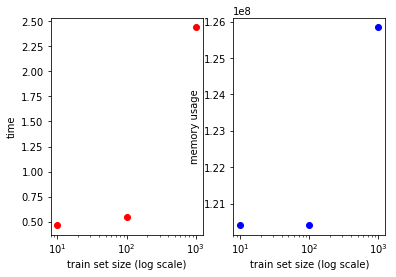

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

### 여기에 각 모의시행 별 소요된 시간, 메모리를 플롯해봅시다

# train size = 10, 100, 1000
times = []
memories = []
sizes = [10, 100, 1000]
for size in sizes:
    total_time, total_memory = simulate(train_size=size)
    times.append(total_time)
    memories.append(total_memory)
    
plt.subplot(121)
plt.plot(sizes, times, 'ro')
plt.xscale('log')
plt.xlabel('train set size (log scale)')
plt.ylabel('time')

plt.subplot(122)
plt.plot(sizes, memories, 'bo')
plt.xscale('log')
plt.xlabel('train set size (log scale)')
plt.ylabel('memory usage')

plt.show()


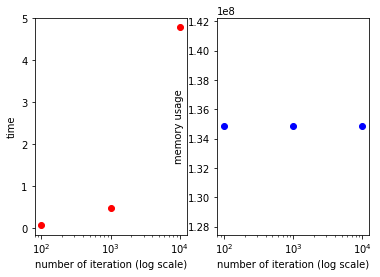

In [4]:
# n_iter = 100, 1000, 10000
times = []
memories = []
n_iters = [100, 1000, 10000]
for n in n_iters:
    total_time, total_memory = simulate(n_iter=n)
    times.append(total_time)
    memories.append(total_memory)
    
plt.subplot(121)
plt.plot(n_iters, times, 'ro')
plt.xscale('log')
plt.xlabel('number of iteration (log scale)')
plt.ylabel('time')

plt.subplot(122)
plt.plot(n_iters, memories, 'bo')
plt.xscale('log')
plt.xlabel('number of iteration (log scale)')
plt.ylabel('memory usage')

plt.show()


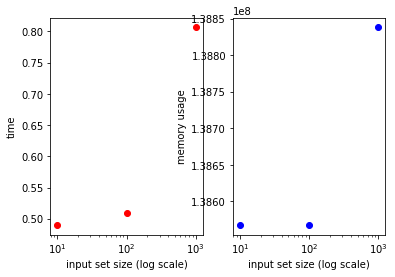

In [5]:
# input size = 10, 100, 1000
times = []
memories = []
sizes = [10, 100, 1000]
for size in sizes:
    total_time, total_memory = simulate(input_size=size)
    times.append(total_time)
    memories.append(total_memory)
    
plt.subplot(121)
plt.plot(sizes, times, 'ro')
plt.xscale('log')
plt.xlabel('input set size (log scale)')
plt.ylabel('time')

plt.subplot(122)
plt.plot(sizes, memories, 'bo')
plt.xscale('log')
plt.xlabel('input set size (log scale)')
plt.ylabel('memory usage')

plt.show()


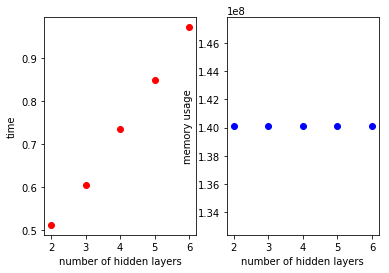

In [6]:
# number of hidden layers = 2, 3, 4, 5, 6
times = []
memories = []
num_layers = [2, 3, 4, 5, 6]
for num in num_layers:
    total_time, total_memory = simulate(hidden_size=[10] * num)
    times.append(total_time)
    memories.append(total_memory)
    
plt.subplot(121)
plt.plot(num_layers, times, 'ro')
plt.xlabel('number of hidden layers')
plt.ylabel('time')

plt.subplot(122)
plt.plot(num_layers, memories, 'bo')
plt.xlabel('number of hidden layers')
plt.ylabel('memory usage')

plt.show()


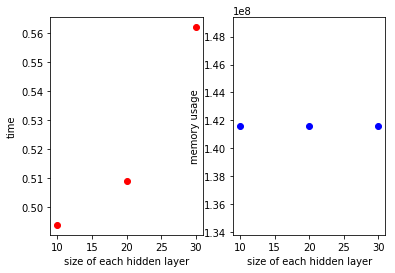

In [7]:
# size of each hidden layer = 10, 20, 30
times = []
memories = []
size_layers = [10, 20, 30]
for size in size_layers:
    total_time, total_memory = simulate(hidden_size=[size] * 2)
    times.append(total_time)
    memories.append(total_memory)
    
plt.subplot(121)
plt.plot(size_layers, times, 'ro')
plt.xlabel('size of each hidden layer')
plt.ylabel('time')

plt.subplot(122)
plt.plot(size_layers, memories, 'bo')
plt.xlabel('size of each hidden layer')
plt.ylabel('memory usage')

plt.show()


In [8]:
# Optimization method
times = []
memories = []
optimizers = ["Adam", "RMSprop", "Momentum"]
for op in optimizers:
    total_time, total_memory = simulate(method=op)
    times.append(total_time)
    memories.append(total_memory)
    
for i in range(3):
    print(optimizers[i], '\ntime:', times[i], '\nmemory usage:', memories[i], '\n')

Adam 
time: 0.48677992820739746 
memory usage: 143753216 

RMSprop 
time: 0.42296934127807617 
memory usage: 143753216 

Momentum 
time: 0.4022231101989746 
memory usage: 143753216 

